<a href="https://colab.research.google.com/github/ansh-tandon/Dogs-vs-Cats-using-CNN/blob/main/CATS_vs_DOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAT vs DOG using CNN

In [38]:
import tensorflow as tf
import zipfile
import urllib.request
import shutil
import os

url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# Instead of downloading the dataset let's extraxt it from Google's API and then Join the directories
filename = 'cats_and_dogs_filtered.zip'
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Code is downloaded from the URL and gets extracted to local directory. os.path.join() is being used to join path of directories & os.listdir() is used for mentioning the list of files in particular directory

train_cats_dir = os.path.join(train_dir, 'cats')  # directory of training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory of training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directoryofvalidation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory of validation dog pictures


In [39]:
# To Print the number of Training and testing/validation images 
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


IMPORT all the necessary libraries possible

In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Using VGG16 pretrained model  
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
# Optimizer as Adam in order to minimize the loss function and also it's a safer option to go for
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [41]:
# DATA AUGMENTATION (first on training and then on validation dataset)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [42]:
#Rescaling the image into fixed input size 
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
# 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [44]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [45]:
# Pre trained weights from ImageNet Dataset where last connected layer is not included as we will be adding our own layer
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [46]:
# GFreezing the layer so it doesn't get trained
for layer in vgg16_model.layers:
    layer.trainable = False
# Flatten returns output of the model
x = Flatten()(vgg16_model.output)
# Dense layer of 256 units and ReLu activation 
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
# Sigmoid function to get output or predict CAT & DOG as 0 or 1
x = Dense(1, activation='sigmoid')(x)

In [47]:
model = Model(inputs=vgg16_model.input, outputs=x)

In [48]:
# Compiling the model
# Binary Crossentropy bcz binary classification task
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
def lr_decay(epoch):
    return 1e-5 * np.exp(-epoch / 5)
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(validation_generator),
                    callbacks=[LearningRateScheduler(lr_decay)])

Epoch 1/15
63/63 [==============================] - 33s 499ms/step - loss: 0.6722 - accuracy: 0.5955 - val_loss: 0.5058 - val_accuracy: 0.8000 - lr: 1.0000e-05
Epoch 2/15
63/63 [==============================] - 30s 482ms/step - loss: 0.5107 - accuracy: 0.7575 - val_loss: 0.4119 - val_accuracy: 0.8600 - lr: 8.1873e-06
Epoch 3/15
63/63 [==============================] - 31s 486ms/step - loss: 0.4524 - accuracy: 0.7880 - val_loss: 0.3660 - val_accuracy: 0.8680 - lr: 6.7032e-06
Epoch 4/15
63/63 [==============================] - 30s 483ms/step - loss: 0.3955 - accuracy: 0.8390 - val_loss: 0.3387 - val_accuracy: 0.8900 - lr: 5.4881e-06
Epoch 5/15
63/63 [==============================] - 30s 481ms/step - loss: 0.3803 - accuracy: 0.8475 - val_loss: 0.3208 - val_accuracy: 0.8910 - lr: 4.4933e-06
Epoch 6/15
63/63 [==============================] - 30s 476ms/step - loss: 0.3633 - accuracy: 0.8520 - val_loss: 0.3083 - val_accuracy: 0.8940 - lr: 3.6788e-06
Epoch 7/15
63/63 [======================

# ACCURACY 

In [50]:
# Evaluating the model on the test set
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 5s 141ms/step - loss: 0.2761 - accuracy: 0.9060
Test accuracy: 0.906000018119812


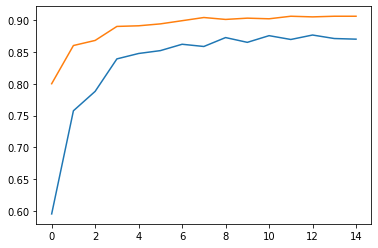

In [51]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')

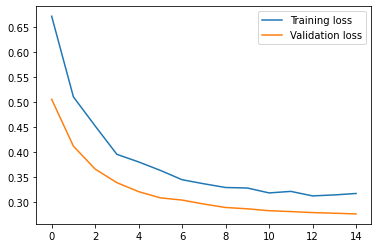

In [53]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

fINALLY GOT AN ACCURACY OF ABOUT 90.6 % WHICH IS QUITE GOOD AND VALIDATION ACCURACY IS ALSO FINE